# Spatialized exploration of the MILES stellar library

Data download: http://svocats.cab.inta-csic.es/miles/index.php?action=credits
#### ACKNOWLEDGMENT
This work is based on data from the MILES service developed by the Spanish Virtual Observatory in the framework of the IAU Comission G5 Working Group : Spectral Stellar Libraries.

In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

import time
from pythonosc import udp_client

import os
from pathlib import Path

import random

In [2]:
import tensorflow as tf
from tensorflow.keras import layers

## Importing the Variational Autoencoder

In [3]:
vae = tf.keras.models.load_model('Miles_VAE.tf')

In [4]:
encoder = tf.keras.models.load_model('Miles_VAE_Encoder.tf')

In [5]:
decoder = tf.keras.models.load_model('Miles_VAE_Decoder.tf')

In [6]:
vae.load_weights('Miles_VAE_Weights')

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
vae.compile(optimizer, loss=tf.keras.losses.MeanSquaredError())

In [8]:
root = '## YOUR FOLDER PATH TO THE DOWNLOADED SPECTRA ##'

## Launching the sonification

 1 Spectrum represented: miles_spec_fits_s0597
[-1276.96454525]
[-244.36086416]
[-3023.50342274]
[505.76936454]
[404.74578738]
[4145.79123259]
[1969.01261806]
[-1102.25334764]
[-1742.7867651]
[-2434.33013558]
[-2120.01413107]
[1547.33598232]
 2 Spectrum represented: miles_spec_fits_s0981
[-1217.15813875]
[-1153.64916623]
[6.4342469]
[451.25506818]
[1311.3373518]
[2846.34411335]
[-1281.55961633]
[1127.81174481]
[-1119.05142665]
[-3488.20209503]
[-516.75055176]


KeyboardInterrupt: 

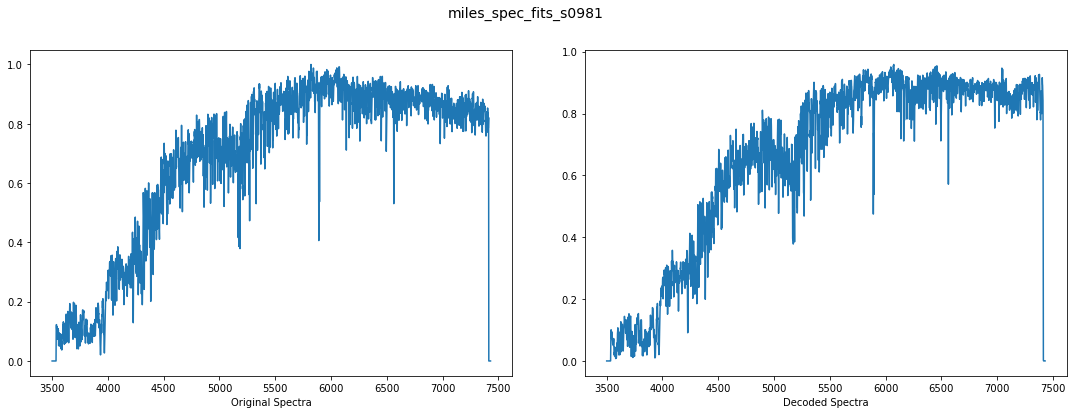

In [9]:
curves=0
for path, subdirs, files in os.walk(root):
    for name in files:
        curves=curves+1
        file = [os.path.join(path, name)]
        str = " " 
        Ffile = (str.join(file))
        route = Path(name)
        Fname = route.with_suffix('')
        Fpng = route.with_suffix('.png')
        
        
        sp = fits.open(Ffile)
        flux2 = np.array(sp[0].data)
        flux_norm = flux2/(np.nanmax(flux2))
        wave2 = np.ones(sp[0].header['NAXIS1'], dtype=float)
        for i in range(sp[0].header['NAXIS1']):
            wave2[i] = sp[0].header['CRVAL1'] + i*sp[0].header['CDELT1']
        sp.close()
        
        flux_print = np.squeeze(flux_norm)
        
        encoded_imgs = encoder(flux_norm).numpy()
        decoded_imgs = vae(flux_norm).numpy()        
       
        fig, ax = plt.subplots(1, 2, figsize=(16, 6))
        fig.suptitle(Fname, size=14)
        fig.subplots_adjust(hspace=0.35, wspace=0.15, left=0.07, right=0.97)
        
        ax[0].plot(wave2, flux_print)
        ax[0].set_xlabel('Original Spectra')   
        ax[1].plot(wave2, decoded_imgs[0])
        ax[1].set_xlabel('Decoded Spectra')
        plt.savefig('Autoencoder.png')
        
        encoded_imgs = np.squeeze(encoded_imgs)
        x = np.zeros((len(encoded_imgs), 1))
        for i in range(len(encoded_imgs)):
            x[i] = encoded_imgs[i]*10000
        
        duration = (0.5,0.75,1,1.25,1.5)
        note_dur = random.choice(duration)
        
        print ("", curves, "Spectrum represented:",Fname)

        client_s = udp_client.SimpleUDPClient("127.0.0.1", 9989)
        client_s.send_message("/s", 1)

        client0 = udp_client.SimpleUDPClient("127.0.0.1", 9990)   
        client0.send_message("/0", x[0])
        print(x[0])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client1 = udp_client.SimpleUDPClient("127.0.0.1", 9991) 
        client1.send_message("/1", x[1])
        print(x[1])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client2 = udp_client.SimpleUDPClient("127.0.0.1", 9992) 
        client2.send_message("/2", x[2])
        print(x[2])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client3 = udp_client.SimpleUDPClient("127.0.0.1", 9993) 
        client3.send_message("/3", x[3])
        print(x[3])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client4 = udp_client.SimpleUDPClient("127.0.0.1", 9994) 
        client4.send_message("/4", x[4])
        print(x[4])
        time.sleep(note_dur)
        note_dur = random.choice(duration)        

        client5 = udp_client.SimpleUDPClient("127.0.0.1", 9995)
        client5.send_message("/5", x[5])
        print(x[5])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client6 = udp_client.SimpleUDPClient("127.0.0.1", 9996)
        client6.send_message("/6", x[6])
        print(x[6])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client7 = udp_client.SimpleUDPClient("127.0.0.1", 9997)
        client7.send_message("/7", x[7])
        print(x[7])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client8 = udp_client.SimpleUDPClient("127.0.0.1", 9998)
        client8.send_message("/8", x[8])
        print(x[8])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client9 = udp_client.SimpleUDPClient("127.0.0.1", 9999)
        client9.send_message("/9", x[9])
        print(x[9])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client10 = udp_client.SimpleUDPClient("127.0.0.1", 9980)
        client10.send_message("/10", x[10])
        print(x[10])
        time.sleep(note_dur)
        note_dur = random.choice(duration)

        client11 = udp_client.SimpleUDPClient("127.0.0.1", 9981)
        client11.send_message("/11", x[11])
        print(x[11])        
        
        plt.close(fig)
        time.sleep(note_dur)
        
        client_s.send_message("/s", 0)
        

In [10]:
import session_info
session_info.show()